#Pergunta fundamental
E qual a relação de uma coisa com outra?

# Vendo dados	2D


## Dados 2D

* Como se dão as interações entre as características das amostras?
* Investigar estas interações é uma arte

In [ ]:
import pandas as pd
!wget http://jse.amstat.org/datasets/kidsfeet.dat.txt
pes = pd.read_csv("kidsfeet.dat.txt",delim_whitespace=True,header=None,names=["Birthmonth","Birthyear","Length","Width",
                                                                  "Sex","Foot","Right_Left_handedness"])
pes

--2022-03-25 17:58:03--  http://jse.amstat.org/datasets/kidsfeet.dat.txt
Resolving jse.amstat.org (jse.amstat.org)... 107.180.48.28
Connecting to jse.amstat.org (jse.amstat.org)|107.180.48.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1638 (1.6K) [text/plain]
Saving to: ‘kidsfeet.dat.txt’

kidsfeet.dat.txt    100%[===================>]   1.60K  --.-KB/s    in 0s      

2022-03-25 17:58:03 (183 MB/s) - ‘kidsfeet.dat.txt’ saved [1638/1638]



,Birthmonth,Birthyear,Length,Width,Sex,Foot,Right_Left_handedness
0,5,88,22.4,8.4,B,L,R
1,10,87,23.4,8.8,B,L,L
2,12,87,22.5,9.7,B,R,R
3,1,88,23.2,9.8,B,L,R
4,2,88,23.1,8.9,B,L,R
5,3,88,23.7,9.7,B,R,R
6,2,88,24.1,9.6,B,L,R
7,6,88,21.0,8.8,G,L,R
8,5,88,21.6,9.3,G,R,R
9,9,88,20.9,8.8,B,R,L


## Dados categóricos

* Vejamos como podemos correlacionar dados categóricos
 * Podemos separar os dados em categorias e visualizar estes dados em diferentes gráficos
* Gráficos de barras não são interessantes para combinar categorias, veja como fica abaixo quando verificamos a quantidade de crianças por Sexo e pelo pé que foi medido.
 * Fica difícil comparar, por vezes temos que pular barras.
 * Podemos usar barras empilhadas
* Gráficos de setores podem ser usados.
 * Observe que as categorias particionam a amostra completamente, então faz sentido o gráfico de setores
 * É difícil para ver nuances
 * São usados em casos específicos
* Mapas de calor
  * Mostra uma matriz como uma imagem. Cada entrada da matriz é uma cor, suja intensidade está associada ao valor.
  * Permitem ver múltiplas categorias ao mesmo tempo

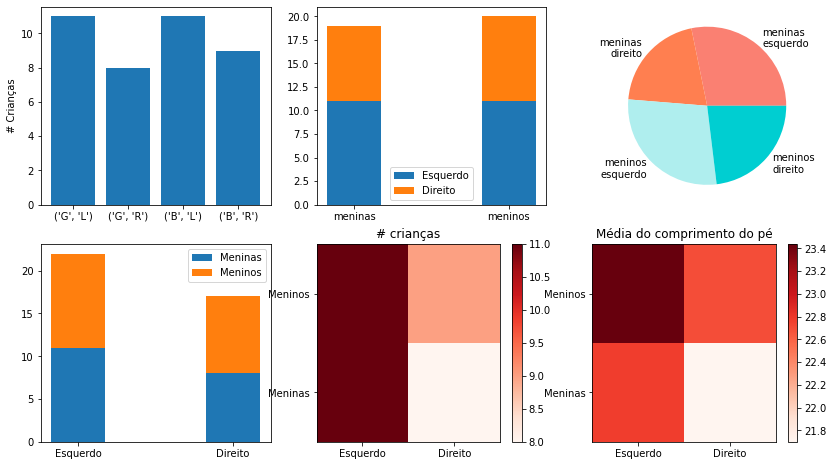

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

categorias = [("G","L"),("G","R"),("B","L"),("B","R")]
dados = {}
for cat in categorias:
  dados[cat] = pes.Foot[(pes.Sex == cat[0]) & (pes.Foot == cat[1])].count()

plt.figure(figsize=(14, 8))

plt.subplot(2,3,1)
plt.bar(range(len(dados)), list(dados.values()), align='center')
plt.xticks(range(len(dados)), categorias)
plt.ylabel("# Crianças")

plt.subplot(2,3,2)
esquerdo = [dados[("G","L")],dados[("B","L")]]
direito = [dados[("G","R")],dados[("B","R")]]
plt.bar(range(2),esquerdo,label="Esquerdo",width=0.35)
plt.bar(range(2),direito,label="Direito",width=0.35,bottom=esquerdo)
plt.xticks(range(2), ["meninas","meninos"])
plt.legend()

plt.subplot(2,3,3)
plt.pie(list(dados.values()),labels=["meninas\nesquerdo","meninas\ndireito","meninos\nesquerdo","meninos\ndireito"],colors=["salmon","coral","paleturquoise","darkturquoise"])

plt.subplot(2,3,4)
meninas = [dados[("G","L")],dados[("G","R")]]
meninos = [dados[("B","L")],dados[("B","R")]]
plt.bar(range(2),meninas,label="Meninas",width=0.35)
plt.bar(range(2),meninos,label="Meninos",width=0.35,bottom=meninas)
plt.xticks(range(2), ["Esquerdo","Direito"])
plt.legend()

plt.subplot(2,3,5)
dadosMatriz = np.array(list(dados.values())).reshape(2,2)
plt.pcolormesh(dadosMatriz,cmap="Reds")
plt.yticks(np.arange(2)+0.5, ["Meninas","Meninos"])
plt.xticks(np.arange(2)+0.5, ["Esquerdo","Direito"])
plt.title("# crianças")
plt.colorbar()

categorias = [("G","L"),("G","R"),("B","L"),("B","R")]
dados = {}
for cat in categorias:
  dados[cat] = pes.Length[(pes.Sex == cat[0]) & (pes.Foot == cat[1])].mean()

plt.subplot(2,3,6)
dadosMatriz = np.array(list(dados.values())).reshape(2,2)
plt.pcolormesh(dadosMatriz,cmap="Reds")
plt.yticks(np.arange(2)+0.5, ["Meninas","Meninos"])
plt.xticks(np.arange(2)+0.5, ["Esquerdo","Direito"])
plt.title("Média do comprimento do pé")
plt.colorbar()
plt.show()

**Resumo**: Existe uma variedade de ferramentas para dados categóricos. Não há regras estritas de quando usar cada um, mas normalmente evita-se os gráficos de setores (ângulos são difícies de medir "no olho") e de barras 3D (barras podem esconder outras barras).

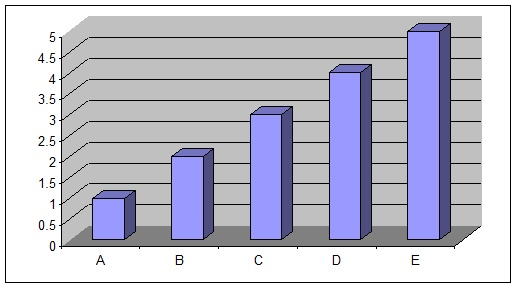


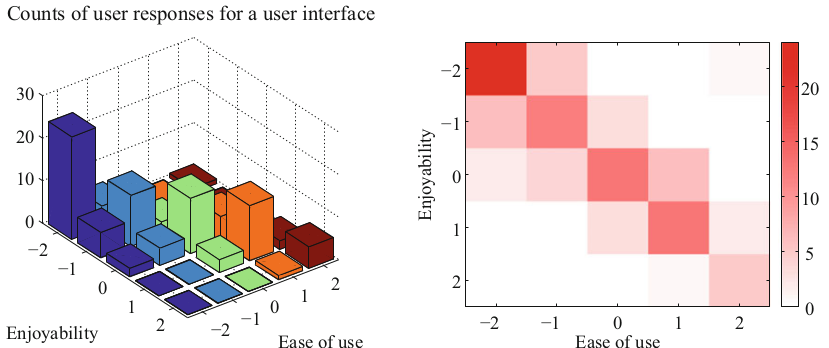

## Séries Temporais

* Dados ordenados no tempo, portanto o gráfico tende a ser desta forma também

In [ ]:
!wget https://dasl.datadescription.com/download/data/3247
goog = pd.read_csv("3247",sep="\t",index_col=0,parse_dates=True)
goog=goog.sort_index()
goog

--2022-03-25 18:31:36--  https://dasl.datadescription.com/download/data/3247
Resolving dasl.datadescription.com (dasl.datadescription.com)... 45.79.130.90
Connecting to dasl.datadescription.com (dasl.datadescription.com)|45.79.130.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘3247’

3247                    [ <=>                ] 111.37K  --.-KB/s    in 0.08s   

2022-03-25 18:31:37 (1.32 MB/s) - ‘3247’ saved [114041]



,Open,High,Low,Close,Volume,Adj.Close6/21/2013,888.34,889.88,873.07,880.93,3982300,880.93.1
Date,,,,,,,,,,,,
2004-08-19,100.00,104.06,95.96,100.34,22351900,100.34,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,101.01,109.08,100.50,108.31,11428600,108.31,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,110.75,113.48,109.05,109.40,9137200,109.40,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,111.24,111.60,103.57,104.87,7631300,104.87,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25,104.96,108.00,103.88,106.00,4598900,106.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-14,880.10,884.70,874.13,875.04,2245000,875.04,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-17,879.23,889.43,878.28,886.25,2146300,886.25,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-18,888.65,901.00,888.35,900.62,2166900,900.62,NaN,NaN,NaN,NaN,NaN,NaN


* Observe abaixo a cotação de fechamento das ações.
 * No caso usamos uma linha para preencher os valores, mas isso deve ser feito com cuidado no caso de ações. Por que não há pregão entre os dias da semana (toda bolsa abre e fecha) e nem nos finais de semana.
 * O uso das linhas seria adequado se a série fosse de temperatura do ar, por exemplo.

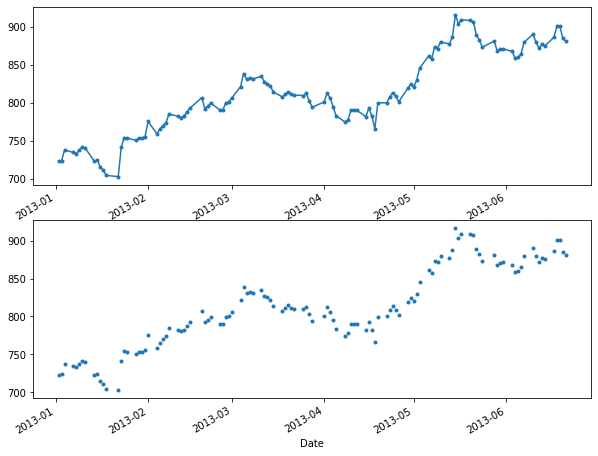

In [ ]:
goog_filtro = goog['2013-01':'2013-06']
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
goog_filtro.Close.plot(marker=".")
plt.subplot(2,1,2)
goog_filtro.Close.plot(marker=".",linestyle="")
plt.show()

## Gráficos de dispersão

* Pense na forma como nós mostramos dados espaciais (coordenadas) em um mapa
 * Latitude e Longitude, para mapas geográficos
 * x e y, para planos cartesianos

**História**: "O ano é 1854 e a cólera se espalha em Londres. Em 10 dias, morrem 500 pessoas. O gráfico de dispersão (mapa de pontos) de John Snow salva o dia!"

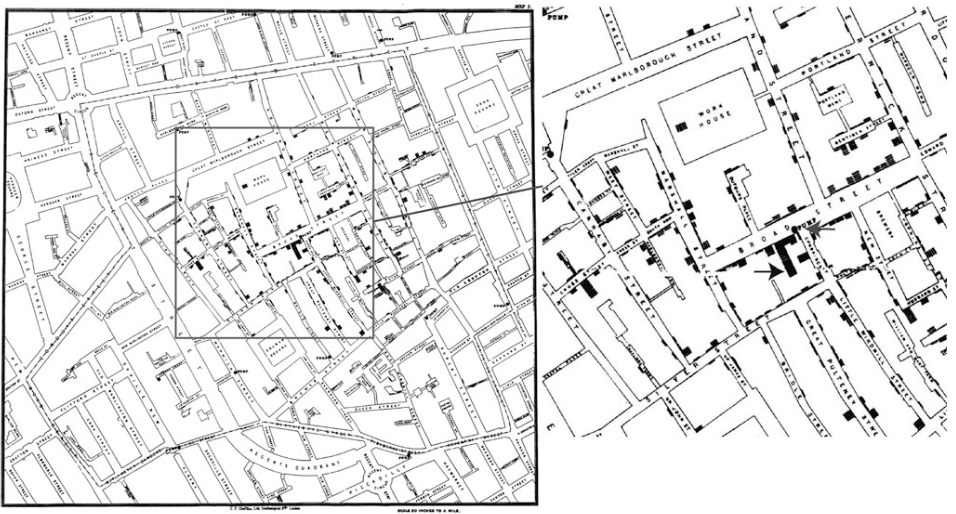

* Podemos usar a mesma técnica, para analisar variáveis não-espaciais
 * Uma das variáveis será o x e a outra o y
* Podemos ver relações entre as variáveis
 * Elas crescem/decrescem juntas?
 * Elas estão relacionadas de alguma forma?
 * Aparentemente, existe algum tipo de função que poderia relacioná-las?
* Podem ser combinados com variáveis categóricas
* **Cuidado**: dados de diferentes escalas podem enganar (seja para indicar relações, seja para não indicá-las)
* **Cuidado**: outliers podem enganar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


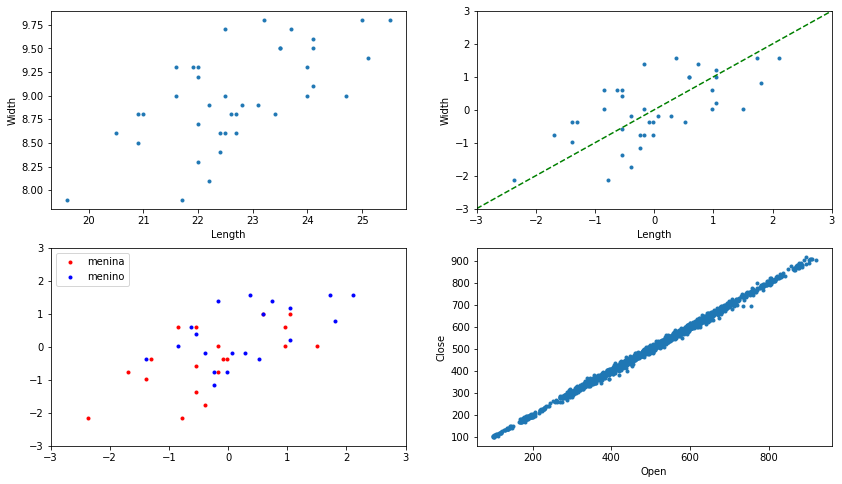

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(2,2,1)
plt.plot(pes.Length,pes.Width,".")
plt.xlabel("Length")
plt.ylabel("Width")
plt.subplot(2,2,2)
pes_normal=(pes-pes.mean())/pes.std()
plt.plot(pes_normal.Length,pes_normal.Width,".")
plt.plot([-3,3],[-3,3],"--g")
plt.xlabel("Length")
plt.ylabel("Width")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.subplot(2,2,3)
pes_menina = pes_normal[pes.Sex == "G"]
pes_menino = pes_normal[pes.Sex == "B"]
plt.plot(pes_menina.Length,pes_menina.Width,"r.",label="menina")
plt.plot(pes_menino.Length,pes_menino.Width,"b.",label="menino")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc=2)
plt.subplot(2,2,4)
plt.plot(goog.Open,goog.Close,'.')
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

**Resumo**: Gráficos de dispersão são a ferramenta mais usada na análise de dados 2D e deveria ser seu primeiro passo quando investigar interações entre variáveis.

## Boas (e más) práticas com gráficos

Aula do curso de Visualiazação da Informação do prof. Ross Ihaka da Universidade de Auckland: https://www.stat.auckland.ac.nz/~ihaka/120/Lectures/lecture03.pdf

O vídeo e material de apoio sobre *Good and bad graphs* é parte de um projeto da *International Association for Statistical Education* (IASE) para maior divulgação de ferramentas e boas práticas na estatística
https://iase-web.org/islp/apps/gov_stats_graphing/GoodBad/index.html

# Resumindo dados 2D em medidas

## Correlação

* Ao olhar para a relação de duas variáveis em um gráfico de dispersão, a questão mais importante é: quando x cresce, y aumenta, diminui ou fica na mesma?

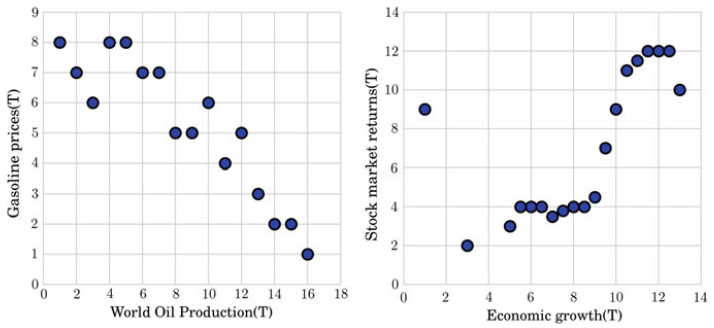

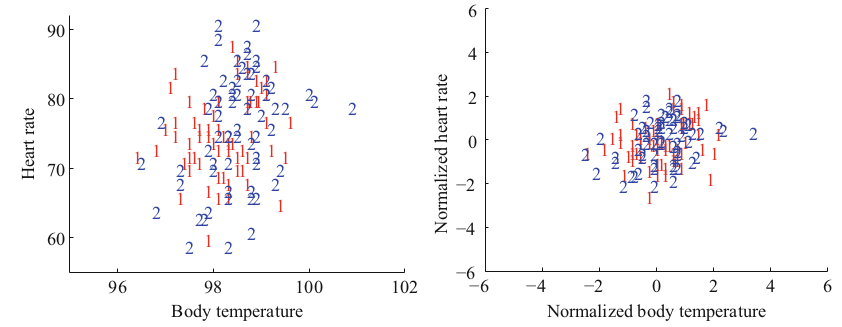

##Coeficiente de correlação

As relações lineares entre duas variáveis $x$ e $y$ podem ser medidas pela **correlação linear**, a qual captura os três casos acima: <u>correlação positiva</u>, que indica que $x$ e $y$ crescem juntas; <u>correlação zero</u>, quando não há relação; e <u>correlação negativa</u>, que indica que quando $x$ cresce, $y$ tende a ser menor.

Existem diferentes formas de medir correlação. Aqui veremos a **correlação de Pearson**.


Considerando duas variáveis $x$ e $y$, ambas de tamanho $N$, fazemos $\hat{x}_i=\frac{x_{i}-\bar{x}}{\sigma_x}$ e $\hat{y}_i=\frac{y_{i}-\bar{y}}{\sigma_y}$. Assim, cada valor $\hat{x}_i$ e $\hat{y}_i$ é **uma diferença** e **está menos sujeita** à influência das escalas.

Definimos então a correlação de Pearson como a média dos produtos dos valores normalizados de $x$ e $y$.

$\rho_{x,y}=corr(x,y)=\frac{\sum_{i=1}^{N}\hat{x}_{i}\hat{y}_{i}}{N}$

Observe que $\hat{x}_i$ indica o quanto $x_i$ varia em relação à média ($\bar{x}$) de $x$. O mesmo pode ser dito de $\hat{y}_i$. Assim, fazendo o produto $\hat{x}_{i}\hat{y}_{i}$ temos as seguintes possibilidades

* $\hat{x}_{i}\hat{y}_{i} > 0$, se os sinais são iguais
* $\hat{x}_{i}\hat{y}_{i} < 0$, se os sinais são diferentes
* $\hat{x}_{i}\hat{y}_{i} = 0$, se pelo menos um dos valores for 0

A correlação está tentando encontrar de que forma estes sinais se comportam em média. Assim, teremos que:
* Se a $\rho_{x,y} > 0$, a correlação é positiva
* Se a $\rho_{x,y} < 0$, a correlação é negativa
* Se a $\rho_{x,y} = 0$, não há correlação

Existem diversas formas de definir a correlação linear de Pearson e você provalvemente vai encontrar uma forma diferente em cada livro. Para ver diferentes formas, sugiro a leitura [Thirteen Ways to Look at the Correlation Coefficient](https://www.stat.berkeley.edu/~rabbee/correlation.pdf).

Vejamos então a correlação entre as variáveis comprimento e largura do pé.

In [ ]:
import numpy as np

#Matriz de correlação
print(np.corrcoef(pes.Length,pes.Width))  #Usando numpy
pes.corr()                                #Usando pandas

[[1.         0.64109605]
 [0.64109605 1.        ]]


,Birthmonth,Birthyear,Length,Width
Birthmonth,1.000000,-0.629762,0.003016,-0.001063
Birthyear,-0.629762,1.000000,-0.305078,-0.259532
Length,0.003016,-0.305078,1.000000,0.641096
Width,-0.001063,-0.259532,0.641096,1.000000


### Como interpretar este valor?

* O valor se aproxima de $1$, quando a correlação é positiva
* O valor se aproxima de $-1$, quando a correlação é negativa
* O valor se aproxima de $0$, quando não há correlação

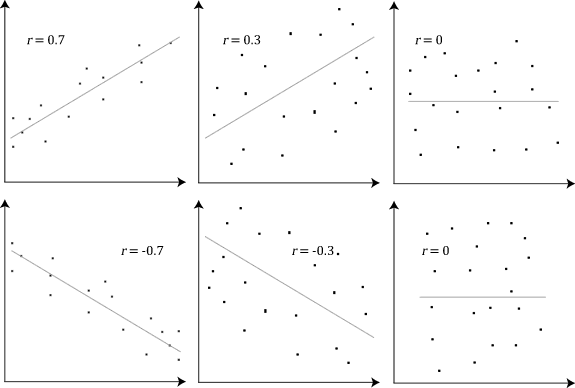

Contudo, deve-se observar os dados e não somente o valor isolado do coeficiente de correlação. Nos exemplos abaixo, o coeficiente de correlação é o mesmo em todos os casos (0.816).

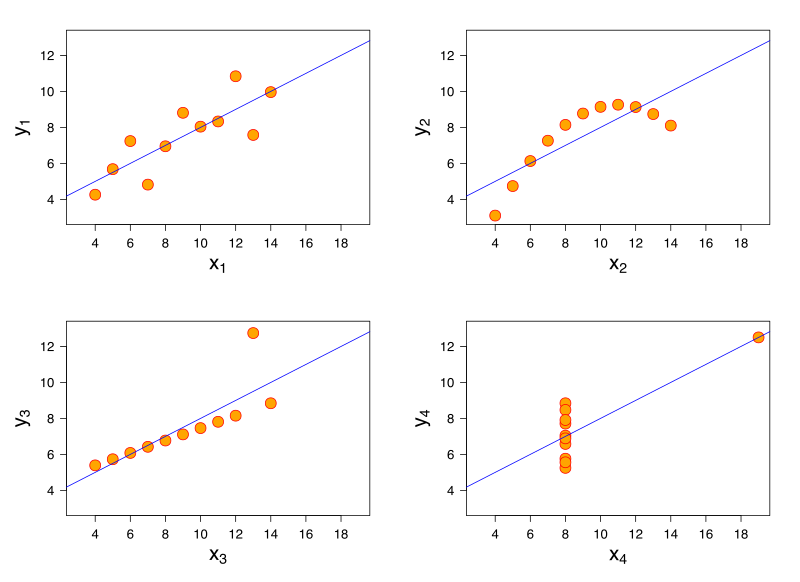

## Propriedades do coefieciente de correlação

1. O coeficiente é simétrico, i.e., $\rho_{x,y} = \rho_{y,x}$
2. O valor absoluto de $\rho_{x,y}$ não muda se modificarmos os dados linearmente. Assim, para constantes $a \neq 0, b, c \neq 0, d$, temos:

<p align="center">$\rho_{ax+b,cy+d} = sign(ac)\rho_{x,y}$</p>

3. Se $\hat{y}$ tende a ser grande (ou pequeno) para valores grandes (ou pequenos, respectivamente) de $\hat{x}$, então o coeficiente de correlação será positivo
4. Se $\hat{y}$ tende a ser pequeno (ou grande) para valores grandes (ou pequenos) de $\hat{x}$, então o coeficiente de correlação será negativo
5. Se $\hat{y}$ não depende de $\hat{x}$, então o coeficiente de correlação será 0 (ou próximo de 0).
6. O maior valor possível de $\rho_{x,y}$ é $1$, que acontece quando $\hat{x} = \hat{y}$
7. O menor valor possível de $\rho_{x,y}$ é $-1$, que acontece quando $\hat{x} = -\hat{y}$

In [ ]:
#Propriedades
length_mod = pes.Length.add(10)
np.corrcoef(length_mod,pes.Width)

array([[1.        , 0.64109605],
       [0.64109605, 1.        ]])

#Correlação e dependência

<p align="center"><b>"Correlação não implica causalidade"</b></p>

* Correlações positivas fortes implicam que as variáveis "andam juntas", crescendo ou decrescendo.
  * Algo similar pode ser dito para correlações negativas fortes, mas de forma contrária
* Isso também permite usar o valor de uma para fazer previsões razoáveis sobre a outra.
* CONTUDO, isto não significa que uma variável CAUSA a outra, ou ainda, que uma DEPENDE da outra.
  * <u>Exemplo</u>: em crianças, há uma correlação forte entre o tamanho do pé e a capacidade de leitura
  * Se vemos correlação entre A e B, não podemos dizer que A explica B. Então, não podemos dizer que fazer nosso pé crescer vai nos fazer ler mais depressa.

* Correlações podem acontecer por:
  * **Acidente**: pequenos conjuntos de observações podem parecer correlacionados
  * **Identidade**: a variável A pode ser computada diretamente da variável B
  * **Relação causal direta**: há relação entre velocidade e deslocamento de um veículo
  * **Relação causal implícita**: pode haver uma **variável latente** que seja a causa das mudanças em ambas as variáveis
    * <u>Exemplo</u>: A idade da criança é a variável latente, crianças mais jovens tendem a ter pés pequenos e menor capacidade de leitura (já que tem menos prática). Crianças de mais idade tendem a ter pés maiores e maior capacidade de leitura (tem mais tempo praticando).

**Resumindo**: a correlação entre duas variáveis não é condição suficiente para estabelecer uma relação causal

<p align="center"><b>Correlação e independência</b></p>

Se as variáveis são independentes, o coeficiente de correlação de Pearson é 0, mas o contrário não é verdadeiro, porque o coeficiente de correlação de Pearson detecta somente a dependência linear entre as duas variáveis.

${\displaystyle {\begin{aligned}x,y{\text{ independentes}}\quad &\Rightarrow \quad \rho _{x,y}=0\quad (x,y{\text{ não são correlacionadas}})\\\rho _{x,y}=0\quad (x,y{\text{ não correlacionadas}})\quad &\nRightarrow \quad x,y{\text{ independentes}}\end{aligned}}}$

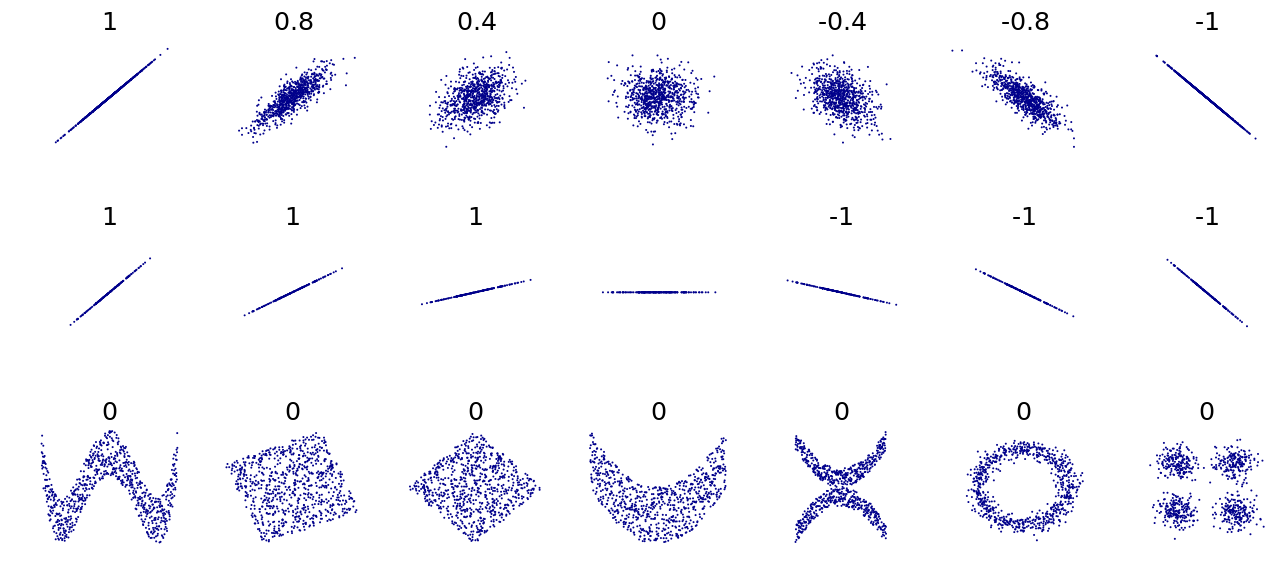

#**Bônus**: Usando a correlação em previsões

* Ao investigar a correlação nós temos uma medida do comportamento das variáveis, mas nós poderíamos usar esta informação para algo a mais?
* Seria possível prever o valor $y_0$ para um dado $x_0$, não pertencente ao conjunto de dados?

Dadas as variáveis $x$ e $y$, e um valor $x_0$, queremos estimar $y_0^p$. Para tanto fazemos:
1. Compute $\bar{x}$, $\bar{y}$, $\sigma_x$, $\sigma_y$ e $\rho_{x,y}$
2. Normalize $x_0$, fazendo $\hat{x}_0 = \frac{x_0-\bar{x}}{\sigma_x}$
3. Estime o valor normalizado de $y_0^p$, fazendo $\hat{y}_0^p = \rho_{x,y}\hat{x}_0$
4. Denormalize $y_0^p = \sigma_y\hat{y}_0^p + \bar{y}$

O mesmo procedimento é feito, se tivermos $y_0$ e quisermos estimar $x_0^p$.


#**Bônus**: Prova de que o coeficiente de correlação reside entre -1 e 1

**Lema 1**: Sejam $x$ e $y$ duas variáveis cujo coeficiente de correlação de pearson é dado por $\rho_{x,y}$, então $\rho_{x,y} \in [-1,1]$

> Relembre que o produto escalar entre dois vetores $\textbf{x}$ e $\textbf{y}$ é dado por
> $\textbf{x} \cdot \textbf{y} = ||\textbf{x}||\,||\textbf{y}||\cos{\theta}$ e que $\textbf{x} \cdot \textbf{x} =||\textbf{x}||^2 \Rightarrow ||\textbf{x}|| = \sqrt{\textbf{x} \cdot \textbf{x}}$

> Relembre ainda que, num sistema de coordenadas ortonormal, temos que
> $\textbf{x} \cdot \textbf{y} = \sum_{i=1}^{n}x_iy_i$ e que $||\textbf{x}|| = \sqrt{x_1^2 + x_2^2 \ldots x_n^2}$

**Prova do Lema 1:**

Assuma que as variáveis originais sejam normalizadas nas variáveis $\hat{x}$ e $\hat{y}$, respectivamente. Assuma ainda que estas variáveis normalizadas sejam vetores n-dimensionais, com coordenadas $(\hat{x}_1,\hat{x}_2,\ldots,\hat{x}_n)$ e $(\hat{y}_1,\hat{y}_2,\ldots,\hat{y}_n)$, respectivamente. Assim, temos que

$||\hat{x}||=\sqrt{\sum_{i=1}^n \hat{x}_i^2} = \sqrt{\sum_{i=1}^n\frac{(x_i-\bar{x})^2}{\sigma_x^2}} = \sqrt{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{\sigma_x^2}} = \sqrt{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n}}} = \sqrt{n}$

O mesmo é válido para $||\hat{y}|| = \sqrt{n}$. A partir da definição para o coeficiente de correlação de Pearson temos que

$\rho_{x,y} = \frac{\sum_{i=1}^{n}\hat{x}_i\hat{y}_i}{n} = \frac{\hat{x} \cdot \hat{y}}{n} = \frac{\hat{x} \cdot \hat{y}}{\sqrt{n}\sqrt{n}} = \frac{\hat{x} \cdot \hat{y}}{||\hat{x}||\,||\hat{y}||} = \cos{\theta}$

Como a imagem da função cosseno está entre $[-1,1]$, assim $\rho_{x,y} \in [-1,1]$